<a href="https://colab.research.google.com/github/GabrielMalinowski/ML_Dataworkshops/blob/master/2_ML_dzie%C5%84_3_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.utils import to_categorical

import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

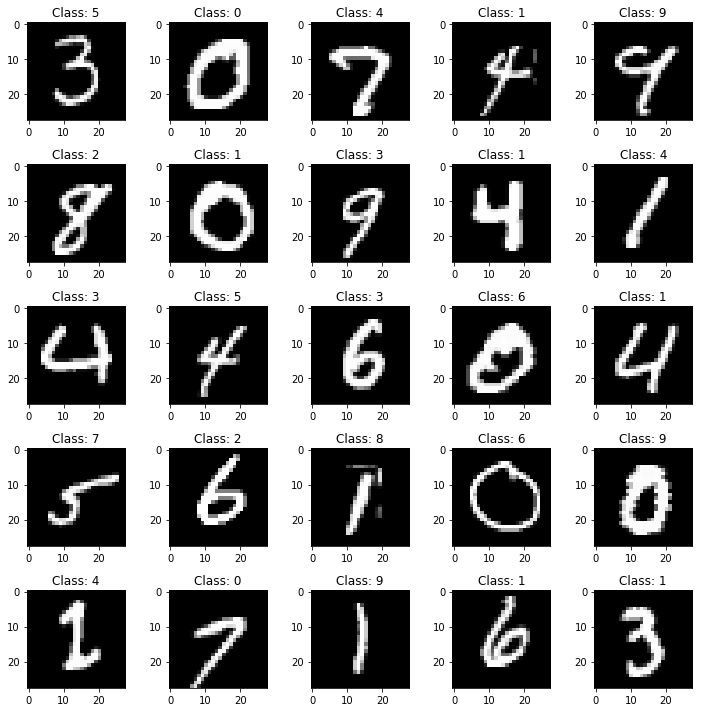

In [23]:
plt.figure(figsize=(10,10))
for idx in range(25):
  plt.subplot(5, 5, idx+1)
  plt.imshow(X_train[idx+50], cmap='gray')
  plt.title('Class: {}'.format(y_train[idx]))

plt.tight_layout()

In [24]:
img_rows, img_cols = X_train.shape[1], X_train.shape[2]

X_train = X_train.reshape(-1, img_rows, img_cols, 1)
X_test = X_test.reshape(-1, img_rows, img_cols, 1)

input_shape = (img_rows, img_cols, 1)

X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [0]:
if np.max(X_train) > 1: X_train = X_train / 255
if np.max(X_test) > 1: X_test = X_test / 255

In [0]:
if len(y_train.shape) == 1:
  num_classes = len(set(y_train))
  y_train = to_categorical(y_train, num_classes)
  y_test = to_categorical(y_test, num_classes)

In [0]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), input_shape=input_shape),
    MaxPool2D(pool_size=(2, 2)),
    
    Conv2D(filters=64, kernel_size=(3, 3)),
    MaxPool2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(512, activation='relu'),    
    Dense(num_classes, activation='softmax')
    
])

#model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
# Trenowanie

model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=3,
    validation_data=(X_test, y_test)
)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 70s 1ms/step - loss: 0.1589 - acc: 0.9528 - val_loss: 0.0533 - val_acc: 0.9833
Epoch 2/3
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0445 - acc: 0.9863 - val_loss: 0.0444 - val_acc: 0.9841
Epoch 3/3
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0295 - acc: 0.9900 - val_loss: 0.0323 - val_acc: 0.9896


In [0]:
# Testowanie
score = model.evaluate(X_test, y_test, verbose=0)

In [38]:
score

[0.03227854451660533, 0.9896]